We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kyrie\ironhack\DAFT_1022\module_2\Lab_21_Time-Series-Models\airlines_passengers.csv")


Let’s display the first five rows of data

In [14]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [15]:
df.tail(5)

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [18]:
df.Month = pd.to_datetime(df.Month)
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


The next thing we can do is convert the month column to an index. 


In [20]:
df.set_index('Month')

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

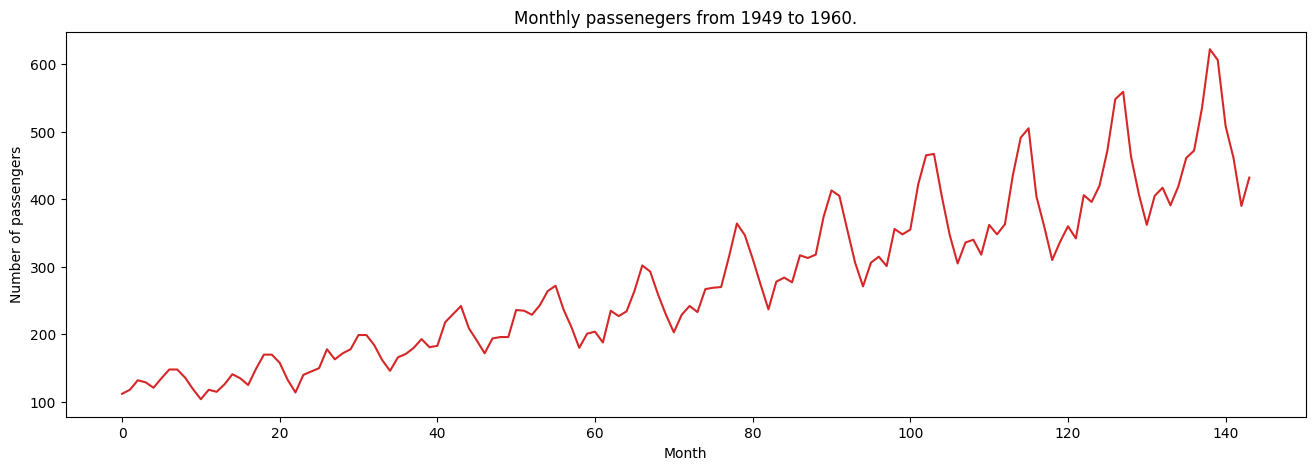

In [27]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Month', ylabel='Number of passengers', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Passengers, title='Monthly passenegers from 1949 to 1960.')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

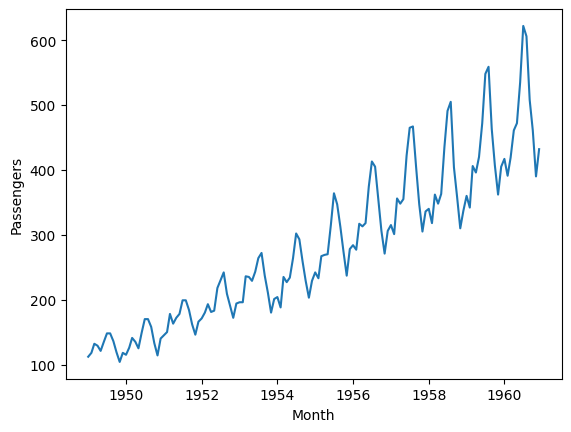

In [30]:
import seaborn as sns

sns.lineplot(data = df , x='Month', y='Passengers')

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [32]:
from statsmodels.tsa.stattools import adfuller

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [34]:

# ADF Test
result = adfuller(df.Passengers.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Store our results in a dataframe display it

Explain the results

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

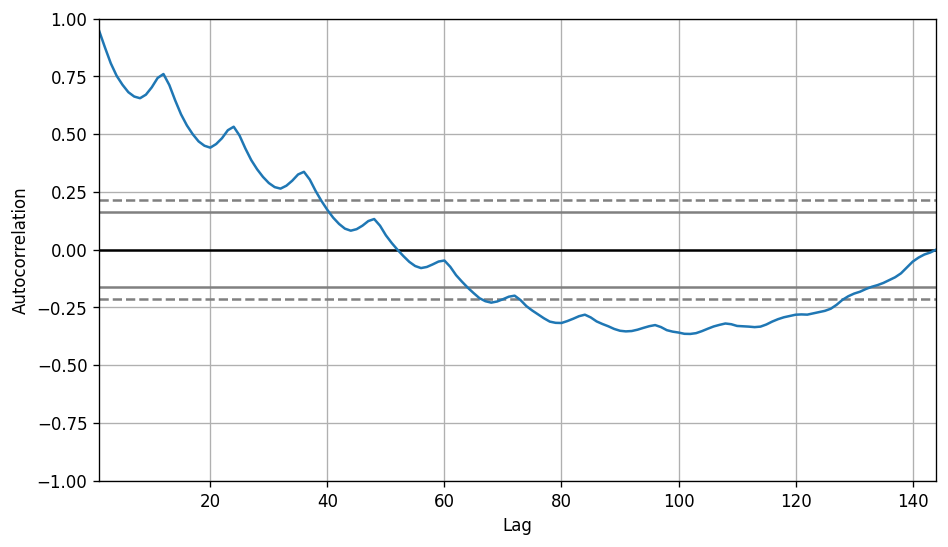

In [35]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.Passengers.tolist())

Calculate partial autocorrelation

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()



Can you describe the charts?


Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

MA(1)

Display the output

MA(2)

Display the output

AR(2)

ARMA (?,?)

Display the output

ARIMA(?,?)

Display the output

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

Calculate AIC